<a href="https://colab.research.google.com/github/Satyake/ZTM-Pytorch-Daniele-instructor-/blob/main/Pytorch_Workflow_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
weight=0.7
bias=0.3
#create 
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:5],y[:5]
print(x.shape,y.shape)

torch.Size([50, 1]) torch.Size([50, 1])


In [ ]:
train_split=int(0.8*len(x))
x_train,y_train= x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

In [ ]:
x_test.dtype

torch.float32

In [ ]:
from torch import nn
class LR(nn.Module): # this contains all the building blocks
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #initialize model parameters
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  
  def forward(self,x):
    return self.weights*x+self.bias


#Pytorch model building essentials
building computational graphs. A NN is basically a computational graph.

**nn.Module**= Base class for all NN modules.

**nn.Parameters** = defining parameters

**torch.optim**= optmizers in pytorch live, for gradient descent

**def forward()**= All nn.Module subclasses require forward(), this method defines what happens in the forward computation.

In [ ]:
torch.manual_seed(42)

model=LR()
list(model.parameters()) #check out model parameters

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#list named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
with torch.inference_mode():
  y_pred=model(x_test)
with torch.no_grad():
  y_pred=model(x_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)


###Training Loop
0. Loop though the data
1. Forward pass
2. Calculate the loss (compare forward predictions to GT)
3. Optimizer zero grad
4. Loss backward - backward pass for gradient calculation
5. Optimizer step- adjust parameters

In [ ]:
epochs=100

#track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  model.train() #train mode in pytorch set

  #forward pass

  y_pred=model(x_train)

  #calculate loss

  loss=loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")
  #zero grad
  optimizer.zero_grad()

  # bpg
  loss.backward()
  #step the otimizer
  optimizer.step()  #how optimizer will accumulate through the loop
  
  ###testing
  model.eval()  #turning off gradient tracking
  with torch.inference_mode():
    test_pred=model(x_test)
    #calculate the test loss
    test_loss=loss_fn(test_pred,y_test)
    if epoch%10==0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss}  Test Loss: {test_loss}")
      print(model.state_dict())




Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534  Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637  Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134  Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0.07

In [ ]:
import numpy as np 
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
      dtype=float32)

In [ ]:
epoch_count

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

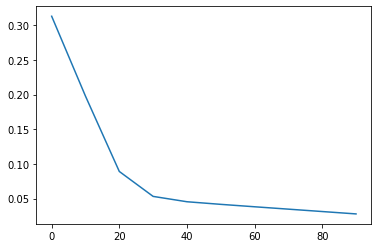

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()))
plt.show()

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

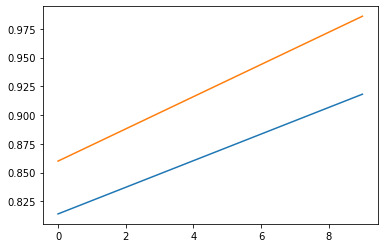

In [ ]:
with torch.inference_mode():
  y_pred=model(x_test)
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test)

In [ ]:
#saving and loading pytorch models
from pathlib import Path #module for dealing with file paths
#create model directory
model_path=Path('models')
model_path.mkdir(parents=True, exist_ok=True)

#create model save path
model_name='01_pytorch_workflow_model_0.pth'
model_save_path=model_path/model_name

#save model state dict
print(f"Saving model to : {model_save_path}")
torch.save(model.state_dict(),model_save_path)
print(model_save_path)

Saving model to : models/01_pytorch_workflow_model_0.pth
models/01_pytorch_workflow_model_0.pth


In [ ]:
torch.load('/content/models/01_pytorch_workflow_model_0.pth')

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
model=LR()
model.load_state_dict(torch.load('/content/models/01_pytorch_workflow_model_0.pth'))

<All keys matched successfully>

In [ ]:
with torch.inference_mode():
  y=model(x_test)
print(y)

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])


In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'